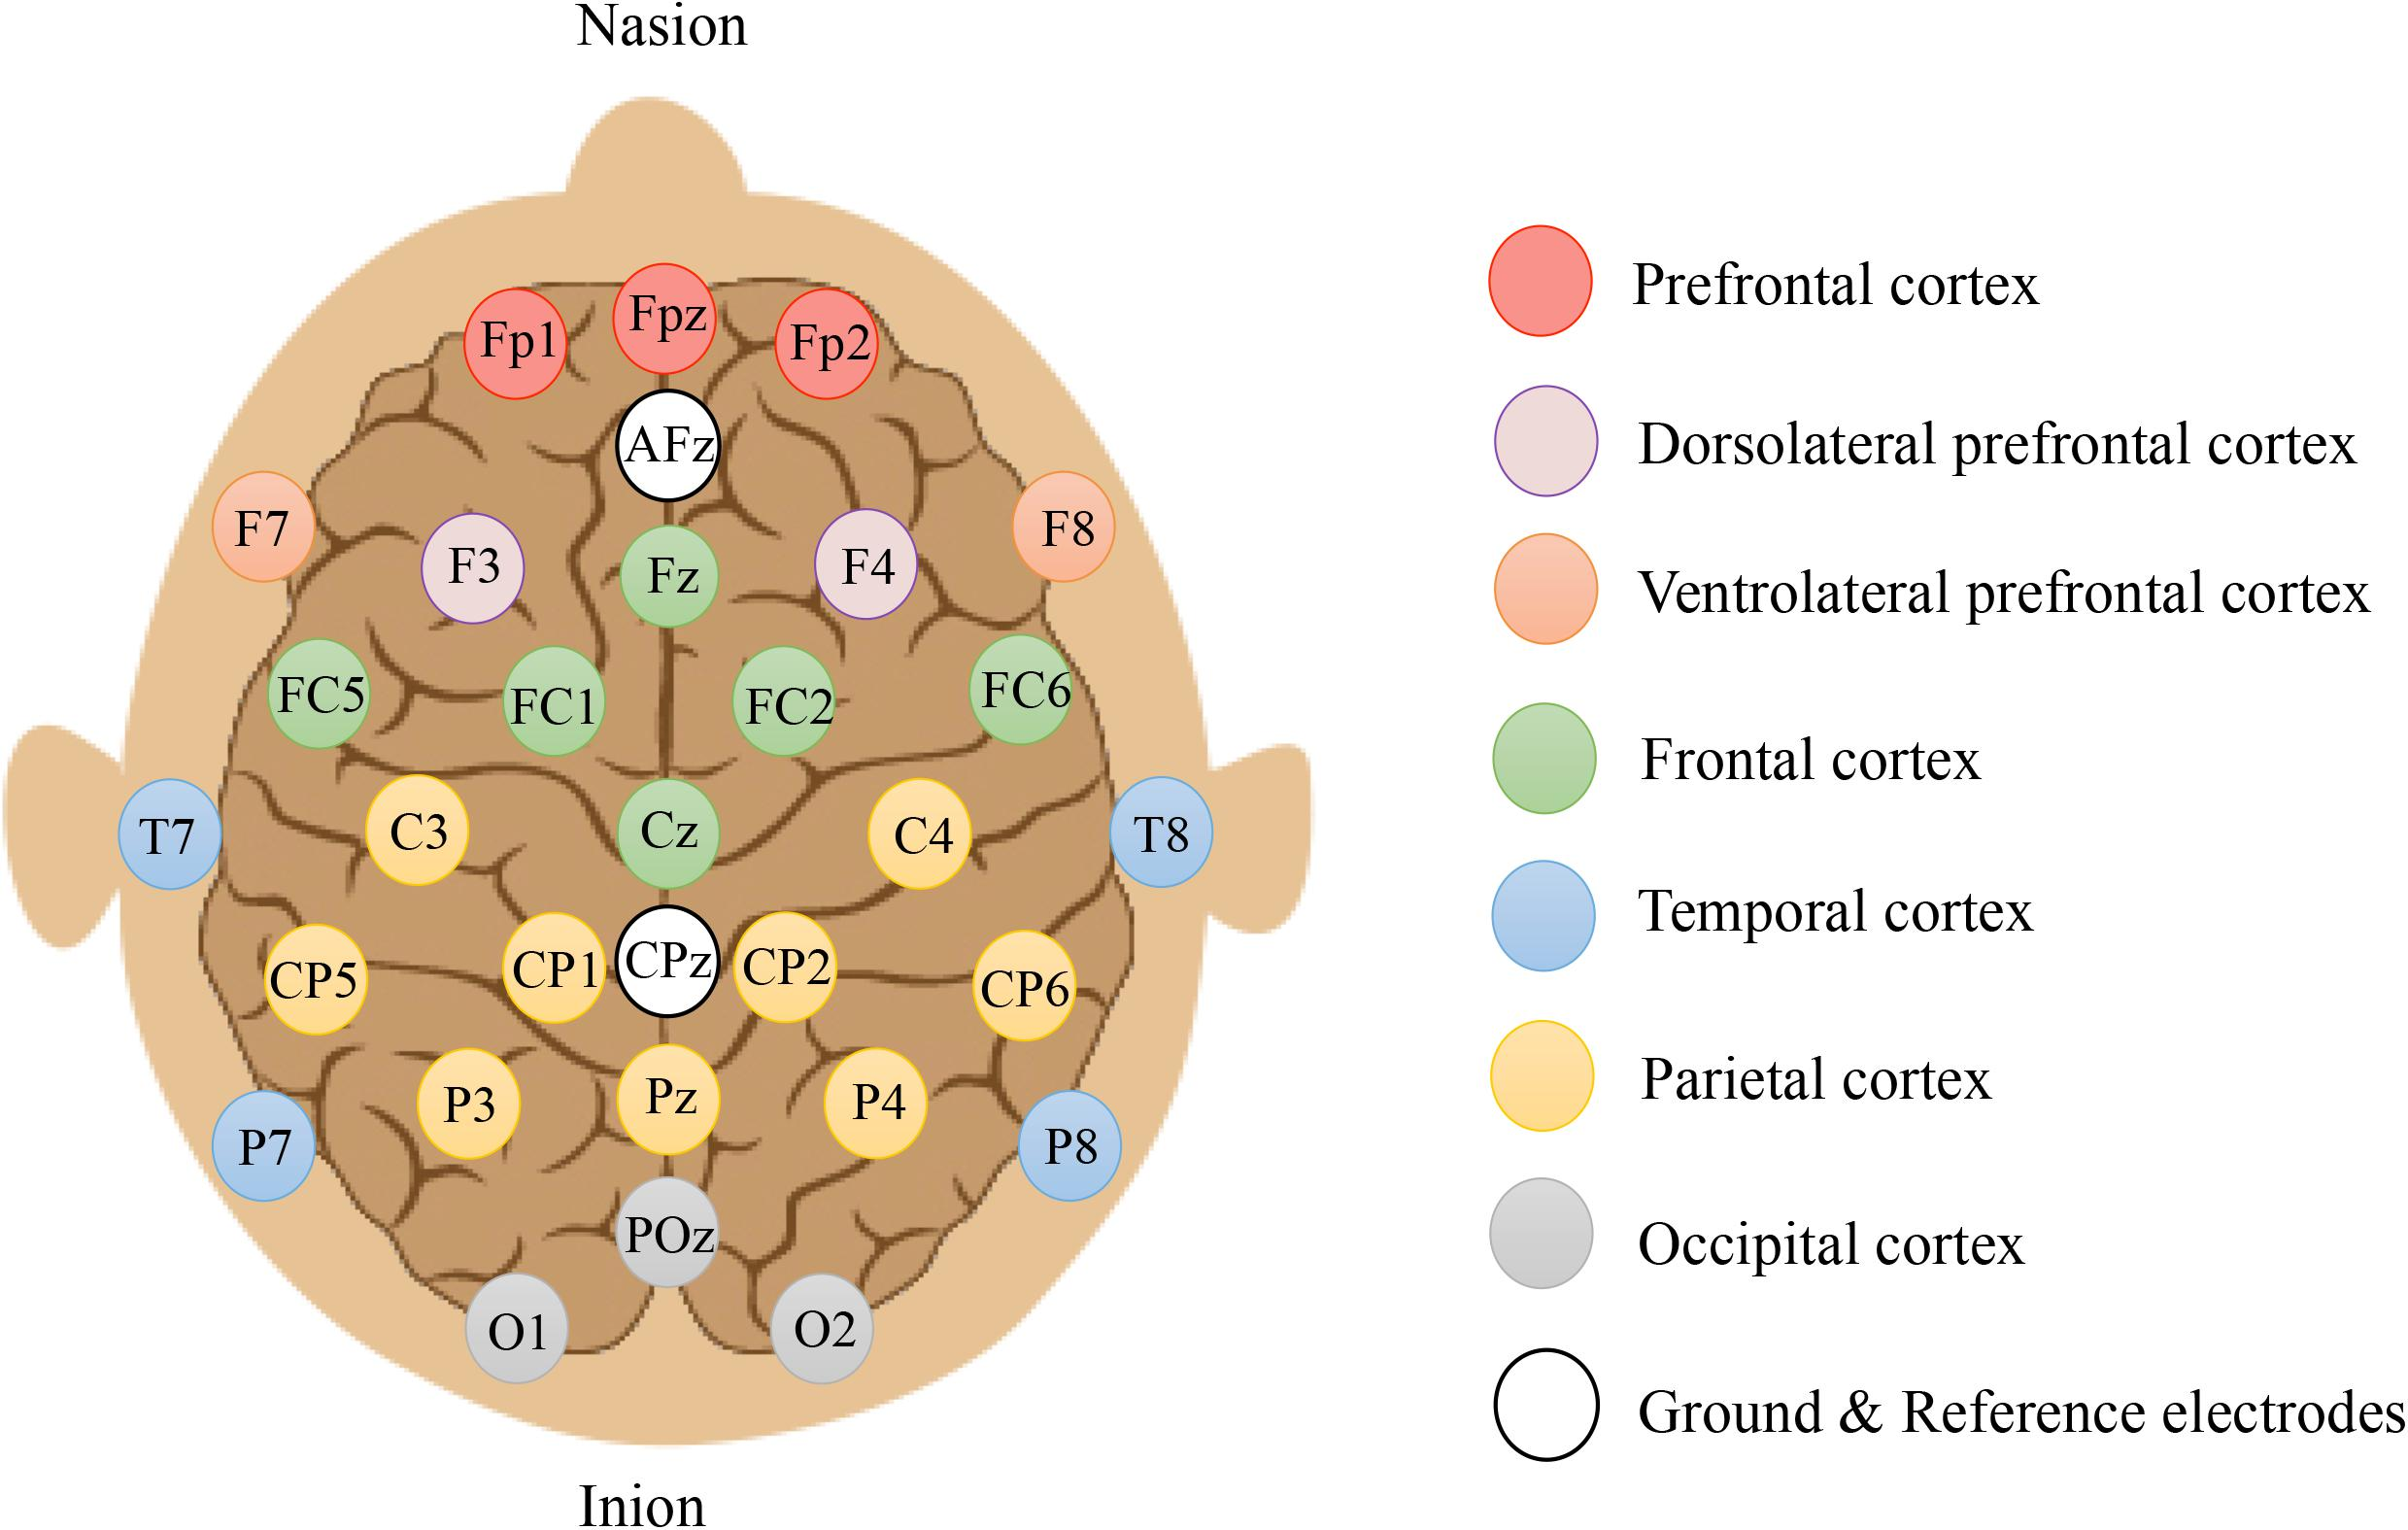

###Import Statements

In [ ]:
%%capture
#Import Statements
from google.colab import drive
drive.mount('/content/drive')
import pandas as pd
!pip install mne
import mne
import os
import numpy as np
import scipy

###Building a dataframe to work on

In [ ]:
#Creating a dataframe by combining all the ADHD patients' csv files

directory_path = '/content/drive/MyDrive/ADHD/'
#directory_path = '/content/drive/MyDrive/ADHD CSV 2/ADHD/'
directory_files = os.listdir(directory_path)

adhd_data_df = pd.DataFrame()
for file in directory_files:
    df_file = pd.read_csv(os.path.join(directory_path, file))
    adhd_data_df = pd.concat([adhd_data_df, df_file])

# Setting 1 (Yes) to attribute class for all rows
adhd_data_df['class'] = 1
adhd_data_df.drop(columns="Unnamed: 0")


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,class
0,226.0,261.0,236.0,261.0,163.0,163.0,89.0,273.0,16.0,273.0,200.0,200.0,200.0,-131.0,126.0,126.0,121.0,15.0,191.0,1
1,156.0,85.0,200.0,226.0,163.0,163.0,126.0,273.0,52.0,200.0,163.0,126.0,200.0,-167.0,200.0,200.0,85.0,-19.0,121.0,1
2,121.0,-90.0,89.0,85.0,52.0,52.0,16.0,126.0,52.0,163.0,16.0,-20.0,126.0,-241.0,200.0,163.0,-19.0,-55.0,50.0,1
3,121.0,-90.0,89.0,85.0,52.0,52.0,16.0,126.0,52.0,163.0,16.0,-20.0,126.0,-241.0,200.0,163.0,-19.0,-55.0,50.0,1
4,156.0,-19.0,310.0,85.0,236.0,-20.0,52.0,52.0,89.0,163.0,200.0,-20.0,126.0,-94.0,126.0,-20.0,226.0,-195.0,332.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15771,156.0,226.0,126.0,156.0,310.0,236.0,310.0,310.0,-57.0,236.0,236.0,89.0,236.0,236.0,126.0,236.0,-55.0,261.0,156.0,1
15772,191.0,226.0,163.0,156.0,273.0,236.0,310.0,163.0,-57.0,52.0,163.0,236.0,126.0,163.0,52.0,89.0,261.0,332.0,226.0,1
15773,85.0,85.0,16.0,121.0,52.0,200.0,89.0,89.0,1083.0,89.0,163.0,273.0,163.0,200.0,89.0,163.0,226.0,297.0,261.0,1
15774,402.0,332.0,384.0,402.0,420.0,457.0,494.0,384.0,-756.0,126.0,236.0,273.0,200.0,310.0,126.0,273.0,191.0,297.0,297.0,1


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
#Creating a dataframe by combining all Control patients' csv files

directory_path = '/content/drive/MyDrive/Control/'
#directory_path = '/content/drive/MyDrive/ADHD CSV 2/Control'
directory_files = os.listdir(directory_path)

control_data_df = pd.DataFrame()
for file in directory_files:
    df_file = pd.read_csv(os.path.join(directory_path, file))
    control_data_df= pd.concat([control_data_df, df_file])

#Setting 0 (No) to attribute class for all rows
control_data_df['class'] = 0
control_data_df.drop(columns=["Unnamed: 0"])


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,class
0,156.0,-90.0,236.0,-125.0,200.0,-167.0,273.0,-167.0,163.0,-241.0,273.0,-167.0,200.0,-204.0,126.0,-204.0,261.0,-195.0,85.0,0
1,191.0,156.0,236.0,297.0,310.0,163.0,126.0,126.0,126.0,273.0,163.0,126.0,200.0,89.0,89.0,200.0,-55.0,156.0,15.0,0
2,15.0,226.0,52.0,191.0,126.0,236.0,163.0,236.0,310.0,163.0,163.0,310.0,236.0,310.0,310.0,126.0,332.0,332.0,332.0,0
3,191.0,261.0,236.0,261.0,236.0,236.0,310.0,236.0,310.0,16.0,310.0,236.0,310.0,163.0,200.0,236.0,50.0,191.0,156.0,0
4,191.0,191.0,200.0,191.0,236.0,126.0,126.0,163.0,126.0,126.0,163.0,200.0,126.0,126.0,52.0,126.0,156.0,261.0,191.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17020,-125.0,-55.0,-94.0,-90.0,-204.0,-278.0,-315.0,-351.0,-204.0,-315.0,-20.0,-20.0,-131.0,-204.0,-131.0,-57.0,-90.0,-336.0,-301.0,0
17021,367.0,402.0,347.0,332.0,200.0,16.0,163.0,89.0,16.0,163.0,310.0,457.0,200.0,347.0,-131.0,236.0,437.0,121.0,50.0,0
17022,437.0,402.0,457.0,367.0,89.0,16.0,52.0,-131.0,89.0,-241.0,89.0,200.0,16.0,16.0,347.0,89.0,261.0,-125.0,-90.0,0
17023,156.0,121.0,200.0,156.0,-94.0,-131.0,-204.0,-167.0,-57.0,-94.0,89.0,200.0,89.0,126.0,52.0,52.0,297.0,15.0,-55.0,0


In [ ]:
#Defining a list with all the channel names
column_name = ['Fp1','Fp2','F3','F4','C3','C4','P3','P4','O1','O2','F7','F8','T7','T8','P7','P8','Fz','Cz','Pz', "class"]

In [ ]:
#Creating a new dataframe by combining the ADHD and Control dataframes
final_df=pd.concat([control_data_df,adhd_data_df],axis=0)
final_df1=final_df.drop(columns=[final_df.columns[0]]) # New dataframe created as to avoid the Unnamed: 0 column
final_df1.columns = column_name
#final_df1=final_df1.sample(frac=1) # Shuffle the rows of the final dataset
final_df2=final_df1.drop(["class"],axis=1)
final_df1.shape
final_df1.head()

,Fp1,Fp2,F3,F4,C3,C4,P3,P4,O1,O2,F7,F8,T7,T8,P7,P8,Fz,Cz,Pz,class
0,156.0,-90.0,236.0,-125.0,200.0,-167.0,273.0,-167.0,163.0,-241.0,273.0,-167.0,200.0,-204.0,126.0,-204.0,261.0,-195.0,85.0,0
1,191.0,156.0,236.0,297.0,310.0,163.0,126.0,126.0,126.0,273.0,163.0,126.0,200.0,89.0,89.0,200.0,-55.0,156.0,15.0,0
2,15.0,226.0,52.0,191.0,126.0,236.0,163.0,236.0,310.0,163.0,163.0,310.0,236.0,310.0,310.0,126.0,332.0,332.0,332.0,0
3,191.0,261.0,236.0,261.0,236.0,236.0,310.0,236.0,310.0,16.0,310.0,236.0,310.0,163.0,200.0,236.0,50.0,191.0,156.0,0
4,191.0,191.0,200.0,191.0,236.0,126.0,126.0,163.0,126.0,126.0,163.0,200.0,126.0,126.0,52.0,126.0,156.0,261.0,191.0,0


###**Visualizing EEG Signals for ADHD and Control Data**

In [ ]:
#adhd_file_path='/content/drive/MyDrive/ADHD CSV 2/ADHD/'
#control_file_path='/content/drive/MyDrive/ADHD CSV 2/Control/'
adhd_file_path='/content/drive/MyDrive/ADHD/'
control_file_path='/content/drive/MyDrive/Control/'

directory_files = os.listdir(adhd_file_path)
adhd_segment_list=[]
for file in directory_files:
  data1=pd.read_csv(os.path.join(adhd_file_path,file))
  data = data1.drop(columns=[data1.columns[0]])
  channel_names = ['Fp1','Fp2','F3','F4','C3','C4','P3','P4','O1','O2','F7','F8','T7','T8','P7','P8','Fz','Cz','Pz']
  data_values = data.values.T
  sfreq = 128
  info = mne.create_info(channel_names, sfreq,ch_types=['eeg','eeg','eeg','eeg','eeg','eeg','eeg','eeg','eeg','eeg','eeg','eeg','eeg','eeg','eeg','eeg','eeg','eeg','eeg'])
  raw = mne.io.RawArray(data_values,info)
  # Segmenting the raw data into segments of 10 seconnds with overlapping of 1
  segments = mne.make_fixed_length_events(raw,id=1,duration=6.0,overlap=1)
  segmented_data = mne.Epochs(raw, segments, baseline=None)
  raw_with_segments = segmented_data.get_data()
  adhd_segment_list.append(raw_with_segments)
  #raw.apply_function(lambda x: x * 1e-6)
  #raw.plot(scalings=dict(eeg=1000e-6))
#print(info)

#Reading events from all patient files
control_segment_list=[]
directory_files = os.listdir(control_file_path)
for file in directory_files:
  data1=pd.read_csv(os.path.join(control_file_path,file))
  data= data1.drop(columns=[data1.columns[0]])
  channel_names = ['Fp1','Fp2','F3','F4','C3','C4','P3','P4','O1','O2','F7','F8','T7','T8','P7','P8','Fz','Cz','Pz']
  data_values = data.values.T
  sfreq = 128
  info = mne.create_info(channel_names, sfreq,ch_types=['eeg','eeg','eeg','eeg','eeg','eeg','eeg','eeg','eeg','eeg','eeg','eeg','eeg','eeg','eeg','eeg','eeg','eeg','eeg'])
  raw = mne.io.RawArray(data_values,info)
  # Segmenting the raw data into segments of 10 seconds with overlapping of 1
  segments = mne.make_fixed_length_events(raw,id=1,duration=6.0,overlap=1)
  segmented_data = mne.Epochs(raw, segments, baseline=None)
  raw_with_segments = segmented_data.get_data()
  control_segment_list.append(raw_with_segments)



In [ ]:
'''num_adhd_segments = sum(len(raw_with_segments) for raw_with_segments in adhd_segment_list)
num_control_segments = sum(len(raw_with_segments) for raw_with_segments in control_segment_list)
print(num_adhd_segments,num_control_segments)'''

In [ ]:
control_segment_labels=[len(i)*[0] for i in control_segment_list]
adhd_segment_labels=[len(i)*[1]for i in adhd_segment_list]
len(control_segment_labels),len(adhd_segment_labels)
#60 Control patients, 61 ADHD patients

In [ ]:
data_list=control_segment_list+adhd_segment_list
label_list=control_segment_labels+adhd_segment_labels

In [ ]:
group_list=[[i]*len(j) for i,j in enumerate(data_list)]
len(group_list)

In [ ]:
data_array=np.vstack(data_list)
label_array=np.hstack(label_list)
group_array=np.hstack(group_list)
print(data_array.shape,label_array.shape,group_array.shape)

In [ ]:
np.mean(data_array,axis=-1).shape

In [ ]:
from scipy import stats
#Shape of a feature must be (3177,19)
def mean(x):
  return np.mean(x,axis=-1)
def std(x):
  return np.std(x,axis=-1)
def var(x):
  return np.var(x,axis=-1)
def ptp(x):
  return np.ptp(x,axis=-1)
def minim(x):
  return np.min(x,axis=-1)
def maxim(x):
  return np.max(x,axis=-1)
def argminim(x):
  return np.argmin(x,axis=-1)
def argmaxim(x):
  return np.argmax(x,axis=-1)
def rms(x):
  return np.sqrt(np.mean(x**2,axis=-1))
def abs_diff_signal(x):
  return np.sum(np.abs(np.diff(x,axis=-1)),axis=-1)
def skewness(x):
  return stats.skew(x,axis=-1)
def kurtosis(x):
  return stats.kurtosis(x,axis=-1)
def concatenate_features(x):
  return np.concatenate((mean(x),std(x),var(x),ptp(x),minim(x),maxim(x),argminim(x),argmaxim(x),rms(x),abs_diff_signal(x),skewness(x),kurtosis(x)),axis=-1)

In [ ]:
features=[]
for d in data_array:
  features.append(concatenate_features(d))

In [ ]:
features_array=np.array(features)
features_array.shape

**Classifying using potential ML algorithms**

Support Vector Machine

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.model_selection import GroupKFold,GridSearchCV
#from sklearn.decomposition import PCA
clf=SVC(kernel='rbf')
gkf=GroupKFold(5)
pipe=Pipeline([('scaler',StandardScaler()),('clf',clf)])
param_grid={'clf__C':[0.1,0.5,0.7,1,3,5,7]}
gscv=GridSearchCV(pipe,param_grid,cv=gkf,n_jobs=6)
gscv.fit(features_array,label_array,groups=group_array)

In [ ]:
print(gscv.best_score_*100,"%")

**Random Forest**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_recall_fscore_support
from sklearn.tree import DecisionTreeClassifier, ExtraTreeClassifier
rf_model = RandomForestClassifier(random_state=15, n_estimators=100)
print("==== RandomForestClassifier ====")
y_pred=[]
y_probs=[]
X_train, X_test, y_train, y_test = train_test_split(features_array, label_array, test_size=0.20, random_state=10)
rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)
y_probs = rf_model.predict_proba(X_test)
cc = []
print(classification_report(y_test,y_pred))
fpr, tpr, _ = roc_curve(y_test, y_pred)
auc = roc_auc_score(y_test, y_pred)
plt.plot(fpr, tpr, label="AUC: {}".format(auc))
plt.legend(loc="best")
plt.show()
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()
#acc = accuracy_score(y_test, y_pred)
#print(f"Accuracy: {acc*100}%")


**K Nearest Neighbors Classifier**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn import metrics
import matplotlib.pyplot as plt
knn_clf = KNeighborsClassifier(n_neighbors=165)
y_pred=[]
y_probs=[]
X_train, X_test, y_train, y_test = train_test_split(features_array, label_array, test_size=0.20, random_state=10)
knn_clf.fit(X_train, y_train)
y_pred = knn_clf.predict(X_test)
y_probs = knn_clf.predict_proba(X_test)
cc = []
cc = precision_recall_fscore_support(y_test, y_pred)
# print(cc)
acc = accuracy_score(y_test, y_pred)
print(f"Accuracy: {acc*100}%")
print(classification_report(y_test,y_pred))
#print(cc)
fpr, tpr, _ = roc_curve(y_test, y_pred)
auc = roc_auc_score(y_test, y_pred)
plt.plot(fpr, tpr, label="AUC: {}".format(auc))
plt.legend(loc="best")
plt.show()
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()